In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariayekwam","key":"41883c3406d6179ab92a78326577da5e"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Apr 14 09:51 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6350        245  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2155         55  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2289         46  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [8]:
!kaggle datasets download -d prasunroy/natural-images

 99% 338M/342M [00:11<00:00, 35.4MB/s]
100% 342M/342M [00:11<00:00, 31.0MB/s]


In [9]:
!unzip natural-images

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflati

In [10]:
from IPython.display import Image, display

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

from keras import models, layers

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from pathlib import Path
import random
from PIL import Image

In [12]:
import os

labels = os.listdir('/content/natural_images')
print(labels)

['car', 'cat', 'motorbike', 'airplane', 'fruit', 'dog', 'person', 'flower']


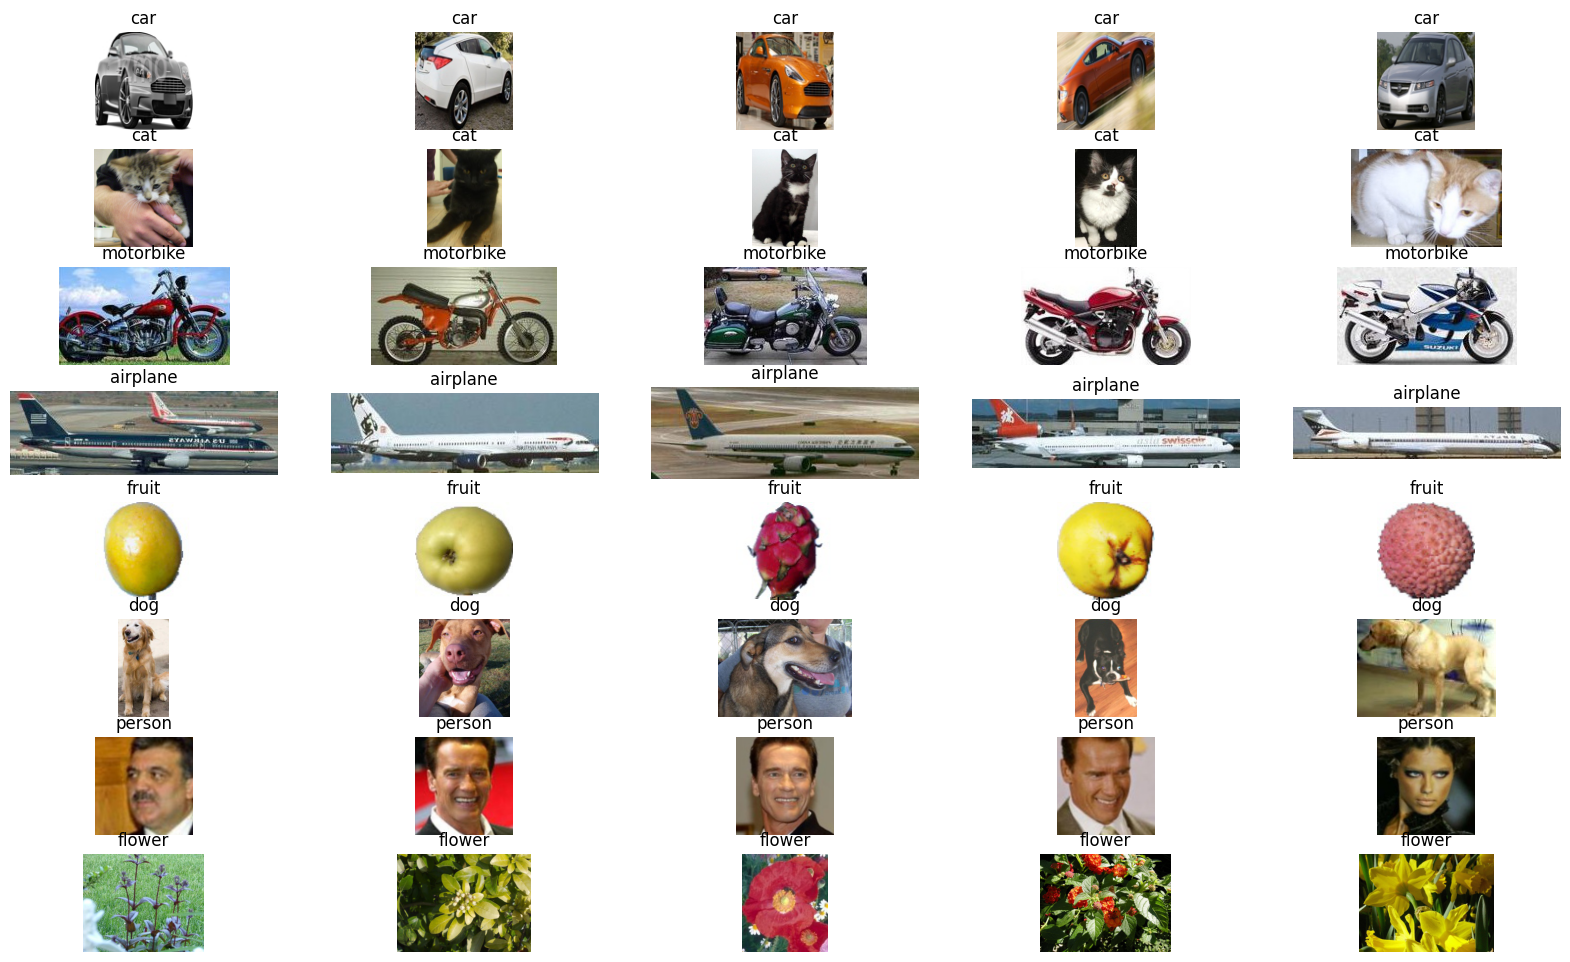

In [16]:
labels = os.listdir('/content/natural_images')
path = Path('/content/natural_images')
def displayRandomImagesFromEveryFolder(directory=path, samplesPerFolder=5):

    fig = plt.figure(figsize=(20,15))

    for rowIndex in range(1, 9):
        subdirectory = str(rowIndex)
        path = directory/labels[rowIndex -1]
        images = os.listdir(path)
        for sampleIndex in range(1,samplesPerFolder+1):
            randomNumber = random.randint(0, len(images)-1)
            image = Image.open(path/images[randomNumber])
            ax = fig.add_subplot(10, 5, samplesPerFolder*rowIndex + sampleIndex)
            ax.axis("off")

            plt.title(str(labels[rowIndex -1]))
            plt.imshow(image, cmap='gray')


    plt.show()

displayRandomImagesFromEveryFolder()

In [18]:
num = []
for label in labels:
    path = '/content/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    # print('\n',f'=====   {label.upper()}   =====')
    for image_path in folder_data:
        if k < 5:
            #display(Image(path+image_path))
            pass
        k = k+1
    num.append(k)

In [19]:
fig = go.Figure(data=[go.Bar(
            x=labels, y=num,
            text=num,
            textposition='auto',
        )])
fig.update_layout(title_text='NUMBER OF IMAGES CONTAINED IN EACH CLASS')
fig.show()

In [21]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '/content/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (120,120))
        x_data.append(np.array(image_resized))
        y_data.append(label)
        pass
    pass

x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)
x_data = x_data.astype('float32')/255

the shape of X is:  (6899, 120, 120, 3) and that of Y is:  (6899,)


In [22]:
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

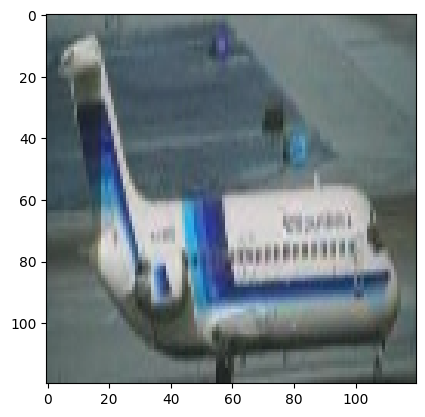

airplane


In [24]:
r = 2999
x = x_data[r]

plt.imshow(x)
plt.show()
print(y_data[r])

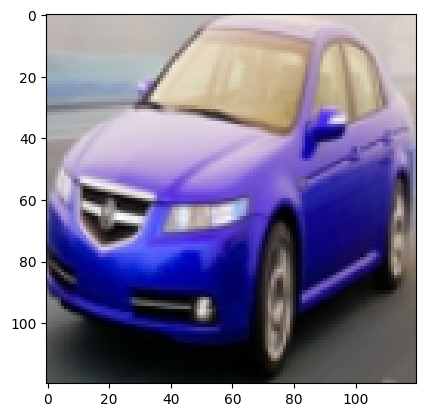

In [26]:
x = x_data[0]
plt.imshow(x)
plt.show()

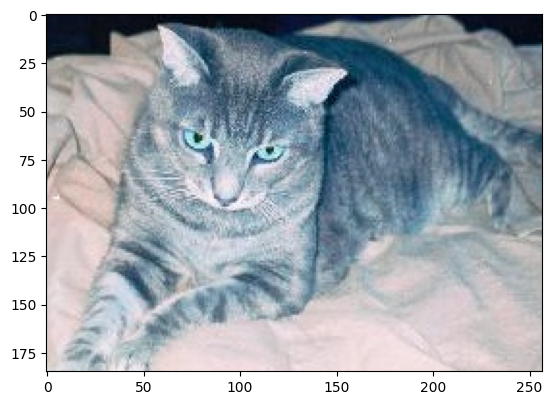

In [28]:
zz = cv2.imread('/content/natural_images/cat/cat_0005.jpg')
plt.imshow(zz)
plt.show()

In [29]:
zz

array([[[ 11,  15,  33],
        [ 11,  15,  33],
        [ 13,  17,  35],
        ...,
        [ 10,  14,  25],
        [ 10,  14,  25],
        [  7,  13,  24]],

       [[ 10,  14,  32],
        [ 10,  14,  32],
        [ 11,  15,  33],
        ...,
        [  9,  13,  24],
        [ 10,  14,  25],
        [  7,  13,  24]],

       [[  8,  15,  32],
        [  8,  15,  32],
        [  9,  16,  33],
        ...,
        [  7,  13,  24],
        [  9,  15,  26],
        [  8,  12,  23]],

       ...,

       [[224, 213, 209],
        [221, 212, 208],
        [217, 208, 205],
        ...,
        [196, 188, 188],
        [201, 193, 193],
        [198, 188, 188]],

       [[226, 216, 216],
        [223, 215, 215],
        [221, 213, 214],
        ...,
        [199, 191, 191],
        [208, 198, 198],
        [205, 193, 193]],

       [[228, 218, 224],
        [226, 219, 224],
        [221, 215, 220],
        ...,
        [204, 195, 192],
        [206, 197, 194],
        [206, 194, 192]]

In [30]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [32]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [33]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
116/116 [==============================] - 15s 28ms/step - loss: 1.0368 - accuracy: 0.6503 - val_loss: 0.5131 - val_accuracy: 0.8173
Epoch 2/20
116/116 [==============================] - 3s 22ms/step - loss: 0.4524 - accuracy: 0.8396 - val_loss: 0.3370 - val_accuracy: 0.8757
Epoch 3/20
116/116 [==============================] - 2s 21ms/step - loss: 0.2930 - accuracy: 0.8921 - val_loss: 0.3050 - val_accuracy: 0.8778
Epoch 4/20
116/116 [==============================] - 3s 23ms/step - loss: 0.2213 - accuracy: 0.9183 - val_loss: 0.3036 - val_accuracy: 0.8951
Epoch 5/20
116/116 [==============================] - 3s 22ms/step - loss: 0.1553 - accuracy: 0.9432 - val_loss: 0.2683 - val_accuracy: 0.9005
Epoch 6/20
116/116 [==============================] - 2s 21ms/step - loss: 0.1176 - accuracy: 0.9575 - val_loss: 0.3100 - val_accuracy: 0.9005
Epoch 7/20
116/116 [==============================] - 2s 21ms/step - loss: 0.0939 - accuracy: 0.9697 - val_loss: 0.2835 - val_accuracy: 0.904

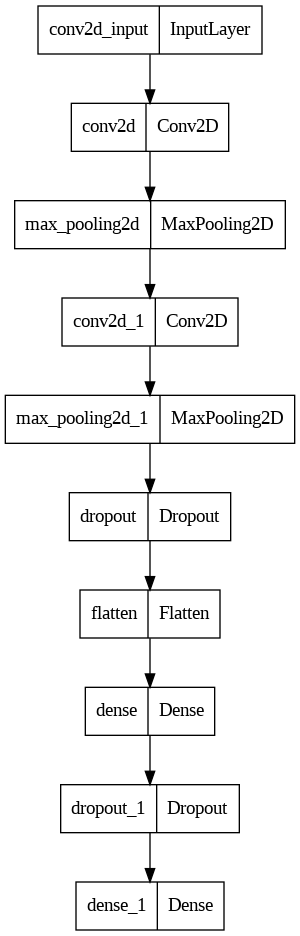

In [34]:
plot_model(model)

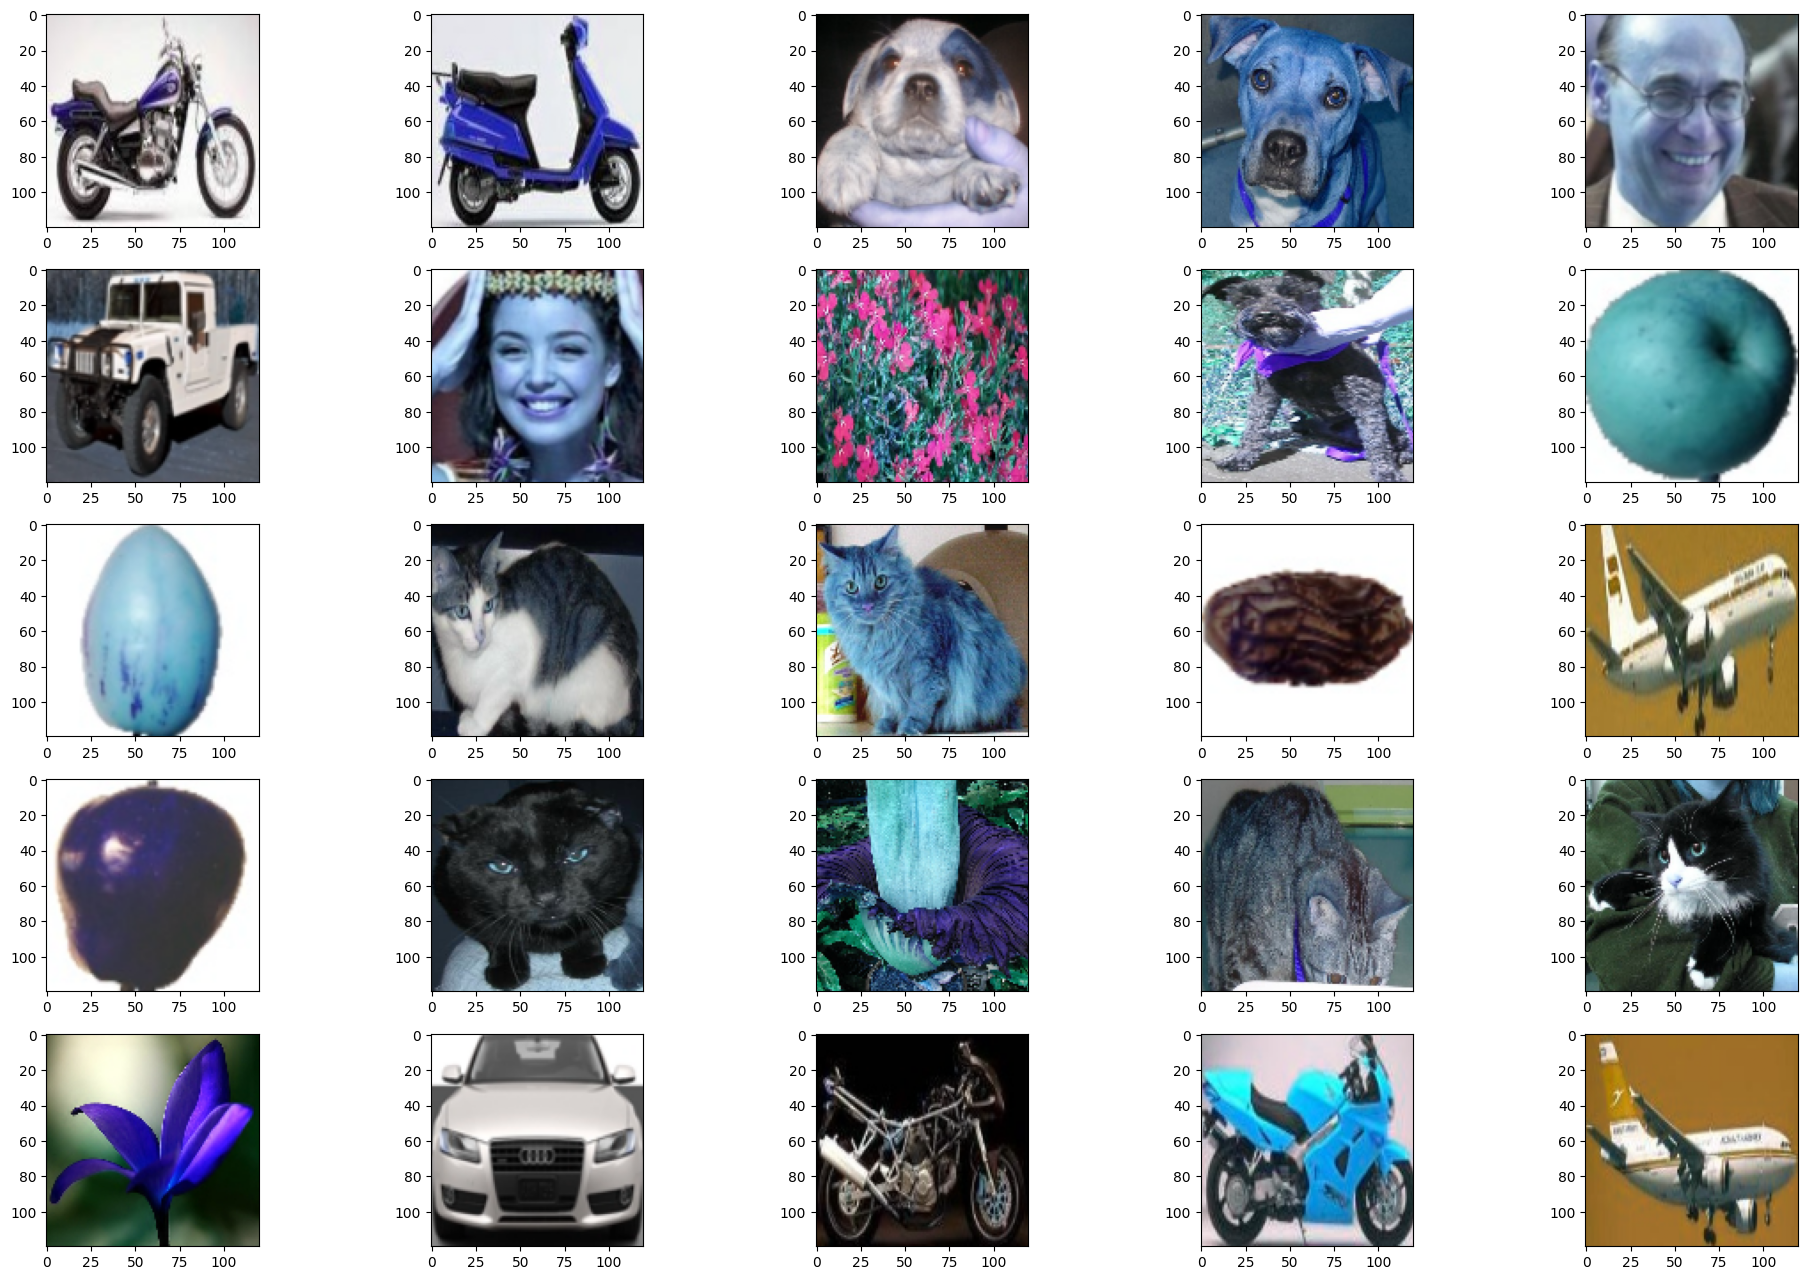

In [35]:
fig = plt.figure(figsize=(24, 16))

for s in range(len(X_test[:25])):
    numberplt = s+1
    fig.add_subplot(5, 5, numberplt)
    plt.imshow(X_test[s])
    pass

In [36]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_test = np.argmax(Y_test, axis = 1)
print(Y_pred,'\n',Y_test)
accuracy_score(Y_pred,Y_test)

72/72 [==============================] - 1s 7ms/step
[6 6 2 ... 7 6 5] 
 [6 6 3 ... 7 6 5]


0.9077733860342556

In [37]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       231
           1       0.94      0.98      0.96       326
           2       0.79      0.76      0.78       318
           3       0.68      0.59      0.63       215
           4       0.85      0.95      0.90       275
           5       0.99      1.00      0.99       335
           6       0.99      0.98      0.99       263
           7       1.00      0.98      0.99       314

    accuracy                           0.91      2277
   macro avg       0.90      0.90      0.90      2277
weighted avg       0.91      0.91      0.91      2277



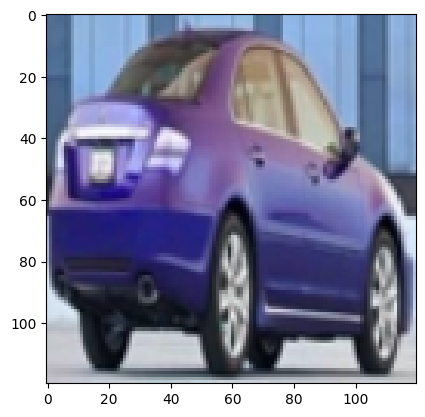

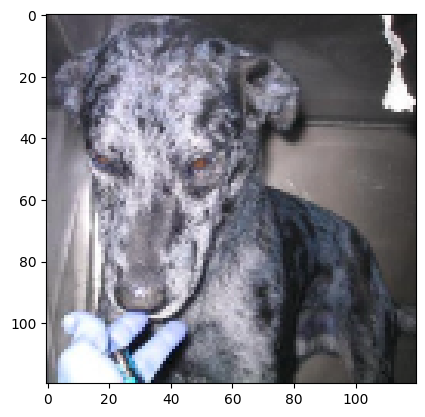

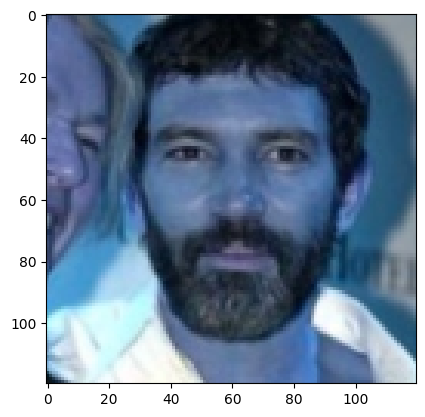

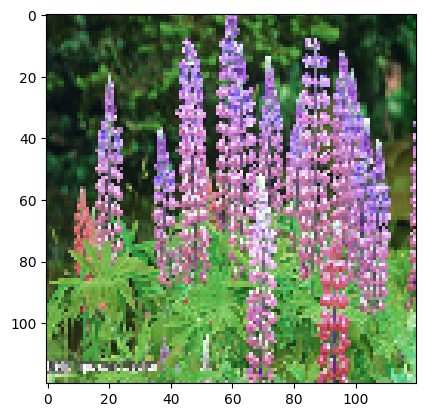

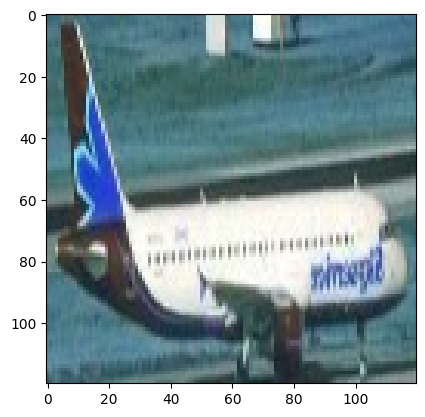

In [38]:
z = X_test[116:121]
for i in z:
    plt.imshow(i)
    plt.show()

1/1 [==============================] - 0s 68ms/step


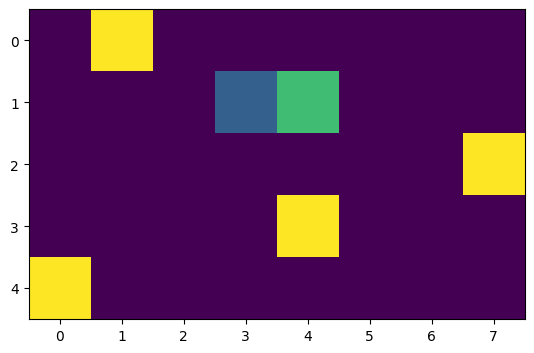

In [39]:
x = model.predict(X_test[116:121])
plt.imshow(x)
plt.show()

In [40]:
Y_pred[:20]

array([6, 6, 2, 3, 7, 1, 7, 4, 3, 5, 5, 2, 2, 5, 0, 5, 2, 4, 2, 2])

In [42]:
Y_test[:20]

array([6, 6, 3, 3, 7, 1, 7, 4, 3, 5, 5, 2, 2, 5, 0, 5, 2, 4, 2, 2])